# Lab 4: Data Cleaning

# Instructor: Li Zeng (lizeng@uw.edu)


Learning Objectives:

By the end of the lab, you will be able to:
1. Report missing values and deal with them.
2. Convert one datatype to another
3. Detect outliers and deal with them
4. Get clean text and extract required information
5. Use Regular Expressions

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
# Read from csv file
original_strava_df = pd.read_csv('strava_activity.csv')
# Let's make a copy of the original strava df and make sure we don't overwrite the original copy
strava_df = original_strava_df.copy()

### What does the data look like?

In [3]:
# What is the size of this dataset?
strava_df.shape

(8093, 53)

In [4]:
# A quick look at the raw data
strava_df.head()

,achievement_count,athlete.badge_type_id,athlete.city,athlete.country,athlete.premium,athlete.resource_state,athlete.sex,athlete.state,athlete_count,average_cadence,...,start_latlng,start_longitude,suffer_score,timezone,total_elevation_gain,total_photo_count,trainer,type,weighted_average_watts,workout_type
0,6,0,Quito,Ecuador,0,2,F,Pichincha,3,NaN,...,[-0.17 -78.49],-78.49,NaN,(GMT-05:00) America/Guayaquil,476.3,0,0,Ride,NaN,NaN
1,0,0,Oisterwijk,The Netherlands,0,2,M,NB,1,NaN,...,[38.68 0.09],0.09,NaN,(GMT+01:00) Europe/Madrid,456.9,0,0,Ride,NaN,0.0
2,8,0,Ypsilanti,United States,0,2,M,MI,2,NaN,...,[42.42 -83.96],-83.96,NaN,(GMT-05:00) America/Detroit,292.2,0,0,Ride,NaN,NaN
3,11,1,Harrogate,United Kingdom,1,2,F,England,2,NaN,...,[53.93 -1.82],-1.82,NaN,(GMT+00:00) Europe/London,1273.3,0,0,Ride,NaN,0.0
4,0,0,Alamo,United States,0,2,F,CA,1,NaN,...,[37.86 -121.97],-121.97,NaN,(GMT-08:00) America/Los_Angeles,166.6,0,0,Hike,NaN,NaN


In [5]:
# Examine the type of each variable
strava_df.dtypes

achievement_count           int64
athlete.badge_type_id       int64
athlete.city               object
athlete.country            object
athlete.premium             int64
athlete.resource_state      int64
athlete.sex                object
athlete.state              object
athlete_count               int64
average_cadence           float64
average_heartrate         float64
average_speed             float64
average_temp              float64
average_watts             float64
comment_count               int64
commute                     int64
device_watts              float64
distance                  float64
elapsed_time                int64
elev_high                 float64
elev_low                  float64
end_latlng                 object
flagged                     int64
gear_id                    object
has_heartrate             float64
has_kudoed                  int64
kilojoules                float64
kudos_count                 int64
location_city              object
location_count

In [6]:
# Check descriptive statistics of each column variable
strava_df.describe()

,achievement_count,athlete.badge_type_id,athlete.premium,athlete.resource_state,athlete_count,average_cadence,average_heartrate,average_speed,average_temp,average_watts,...,private,resource_state,start_latitude,start_longitude,suffer_score,total_elevation_gain,total_photo_count,trainer,weighted_average_watts,workout_type
count,8093.000000,8093.000000,8093.000000,8093.0,8093.000000,1666.000000,1929.000000,8093.000000,1528.000000,3884.000000,...,8093.0,8093.0,7432.000000,7432.000000,682.000000,8093.000000,8093.000000,8093.000000,309.000000,3486.000000
mean,3.841715,0.207093,0.203262,2.0,2.027555,77.380852,138.369311,4.776164,16.852094,129.217817,...,0.0,2.0,32.468071,-15.664773,71.890029,225.484765,0.076980,0.043989,182.323625,1.216007
std,8.710141,0.421686,0.402451,0.0,8.495287,16.753410,23.334950,23.155401,7.799240,54.808192,...,0.0,0.0,28.494918,77.450225,66.407220,645.911446,0.464648,0.205082,51.676492,3.104601
min,0.000000,0.000000,0.000000,2.0,1.000000,0.000000,0.000000,0.000000,-23.000000,0.000000,...,0.0,2.0,-46.400000,-158.060000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000
25%,0.000000,0.000000,0.000000,2.0,1.000000,73.300000,128.000000,2.647000,11.000000,92.200000,...,0.0,2.0,33.480000,-80.675000,30.000000,10.700000,0.000000,0.000000,148.000000,0.000000
50%,1.000000,0.000000,0.000000,2.0,1.000000,80.700000,141.700000,3.790000,17.000000,126.500000,...,0.0,2.0,42.350000,-2.160000,56.000000,63.700000,0.000000,0.000000,179.000000,0.000000
75%,4.000000,0.000000,0.000000,2.0,1.000000,85.900000,152.000000,6.379000,22.000000,161.125000,...,0.0,2.0,51.470000,7.705000,91.000000,246.600000,0.000000,0.000000,215.000000,0.000000
max,135.000000,4.000000,1.000000,2.0,424.000000,210.300000,199.200000,1888.900000,41.000000,506.600000,...,0.0,2.0,69.960000,176.390000,697.000000,19803.000000,11.000000,1.000000,330.000000,12.000000


### Deal with Missing Values

In [7]:
# You can detect how distinct values for a variable - set dropna = False to include missing value
strava_df['athlete.sex'].value_counts(dropna = False)

M      4084
F      3824
NaN     185
Name: athlete.sex, dtype: int64

In [9]:
# remove missing values
# when inplace = True, do operation inplace and return None
strava_df['athlete.sex'].dropna(axis=0, inplace=True)

In [10]:
# check again for missing value
strava_df['athlete.sex'].value_counts(dropna = False)

M    4084
F    3824
Name: athlete.sex, dtype: int64

In [11]:
# Alternatively, you can just count the number of missing values. Especially when you deal with numeric variables
pd.isnull(strava_df['suffer_score']).sum()

7411

In [12]:
# let's take a look at a small extract of this variable
strava_df['suffer_score'].iloc[10:20]

10    55.0
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: suffer_score, dtype: float64

In [13]:
# instead of removing missing values, you can fill missing values - data imputation
# for example, we can use median to replace missing values
value_to_fill = strava_df['suffer_score'].median() 
strava_df['suffer_score'].fillna(value = value_to_fill, axis = 0, inplace = True)
# Let's look at the data extract again
print(strava_df['suffer_score'].iloc[10:20])

10    55.0
11    56.0
12    56.0
13    56.0
14    56.0
15    56.0
16    56.0
17    56.0
18    56.0
19    56.0
Name: suffer_score, dtype: float64


### Correct Data Type

In [14]:
# Examine the data type of the variable "start_date"
strava_df['start_date'].head()

0    2014-08-27T20:55:26Z
1    2015-08-04T07:25:02Z
2    2015-05-17T18:38:04Z
3    2014-05-26T08:20:53Z
4    2013-12-19T17:05:16Z
Name: start_date, dtype: object

We can see the start_date is of type object

In [15]:
# Convert the object type to date 
strava_df['start_date'] = pd.to_datetime(strava_df['start_date'])

In [16]:
# Examine the result
strava_df['start_date'].head()

0   2014-08-27 20:55:26
1   2015-08-04 07:25:02
2   2015-05-17 18:38:04
3   2014-05-26 08:20:53
4   2013-12-19 17:05:16
Name: start_date, dtype: datetime64[ns]

The start date is now converted to datetime

### Detect Outliers

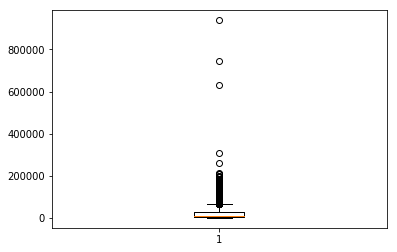

In [17]:
# Detecting Outliers using visualization
plt.boxplot(strava_df['distance'])
plt.show()

In [18]:
# Finding Interquartile range -  the difference between 75th and 25th quantiles
# lower quantile
Q1 = strava_df['distance'].quantile(0.25)
# upper quantile
Q3 = strava_df['distance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23904.6


In [19]:
# IQR Rule for Outliers
condition = (strava_df['distance'] < (Q1 - 1.5 * IQR)) |(strava_df['distance'] > (Q3 + 1.5 * IQR))
outliers = strava_df['distance'][condition]
outliers.shape

(565,)

In [20]:
# You can have a subset without the outlier
# But outliers are not errors so I don't recommend that you remove it from the dataset unless there is a good reason
strava_df['distance'][~condition]
# If you want to drop it
#strava_df['distance'].dropna(axis=0, inplace = True)
#strava_df.shape

0       21580.0
1       19092.8
2       23023.4
4        2739.8
5       13056.7
6       24438.8
7        9447.6
8           0.0
9        4814.0
10      33632.8
11      15818.6
12      16014.5
13       3157.1
14      10628.8
15      62910.9
16       5000.0
17      28765.1
19      32186.9
20      41926.3
21      43609.3
22      25781.1
23       8371.3
24      48415.5
25       6042.5
26      34499.3
27      21587.8
28      63273.8
29      54424.2
30      10122.0
31       6063.5
         ...   
8060    22881.0
8061     6124.9
8063    37085.1
8064    56494.4
8065    30373.0
8066     1786.8
8067    15114.6
8068    24143.9
8070      833.4
8071     6041.3
8072    38748.2
8073    24481.5
8074     8011.4
8075    22547.9
8076    21009.2
8077    30143.3
8078     6523.1
8079     2680.4
8080     3366.2
8081    54122.9
8082    33359.0
8084        0.0
8085     8155.3
8086     3218.7
8087     3521.8
8088    36105.8
8089    15747.0
8090    14904.3
8091     4638.6
8092    38714.9
Name: distance, Length: 

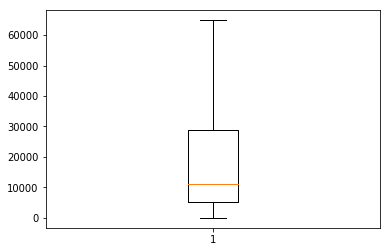

In [21]:
# to not show outliers in a boxplot - set showfliers = false
plt.boxplot(strava_df['distance'], showfliers = False)
plt.show()

The plot looks better now

### Text Cleaning

In [22]:
# Let's take a look at the end latitude/longitude data
strava_df['end_latlng'].head()

0     [-0.17 -78.49]
1       [38.68 0.09]
2     [42.42 -83.96]
3      [53.93 -1.82]
4    [37.86 -121.97]
Name: end_latlng, dtype: object

#### Let's start with using strip() for text cleaning

In [23]:
# Cleaning Text and extracting required information
# Extract end point latitude and longitude in separate columns
# First, let's get rid of the brackets
processed_latlng = strava_df['end_latlng'].str.strip('[').str.strip(']')
print(processed_latlng.head())

0     -0.17 -78.49
1       38.68 0.09
2     42.42 -83.96
3      53.93 -1.82
4    37.86 -121.97
Name: end_latlng, dtype: object


In [24]:
# The data is in a text format 
# We want to seperate lat and lng just as how the start lat/lng are stored in this dataset
end_lat, end_lng = processed_latlng.str.split(' ').str

In [25]:
strava_df['end_lat'] = pd.to_numeric(end_lat)
print(strava_df['end_lat'].head())

0    -0.17
1    38.68
2    42.42
3    53.93
4    37.86
Name: end_lat, dtype: float64


In [26]:
strava_df['end_lng'] = pd.to_numeric(end_lng)
print(strava_df['end_lng'].head())

0    -78.49
1      0.09
2    -83.96
3     -1.82
4   -121.97
Name: end_lng, dtype: float64


#### Now, let's try to clean the text using regular expressions!

In [27]:
def regex_func(x):
    if x == x:
        return re.findall(r"[\d\-\.]+", x)
    else:
        return [np.NaN, np.NaN]

In [28]:
end_lat, end_lng = strava_df['end_latlng'].apply(lambda x: regex_func(x)).str

In [29]:
strava_df['end_lat_2'] = pd.to_numeric(end_lat)
print(strava_df['end_lat_2'].head())

0    -0.17
1    38.68
2    42.42
3    53.93
4    37.86
Name: end_lat_2, dtype: float64


In [30]:
strava_df['end_lng_2'] = pd.to_numeric(end_lng)
print(strava_df['end_lng_2'].head())

0    -78.49
1      0.09
2    -83.96
3     -1.82
4   -121.97
Name: end_lng_2, dtype: float64


## Exercise

1. Report the number of missing values of countries of athletes.
2. Report the outliers of time elapsed. Can you reason why there may be outliers in this column?
3. Extract Time Zone without the location name. Eg: extract GMT+01:00 from (GMT+01:00) Europe/Amsterdam

In [31]:
# Let's try to do it using regular expressions!
def regex_func(x):
    if x == x:
        return re.search(r"\((.*)\)", x).group(1)
    else:
        return np.NaN
time_zone = strava_df['timezone'].apply(lambda x: regex_func(x))

In [33]:
#Missing values in athlete countries
strava_df['athlete.country'].isnull().sum() 

200

Number of missing values in Athlete countries is 200 

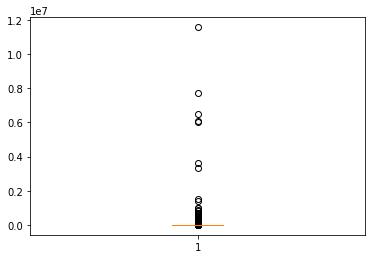

In [34]:
#Outliers in Elapsed time

plt.boxplot(strava_df['elapsed_time'])
plt.show()

In [37]:
Q1 = strava_df['elapsed_time'].quantile(0.25)
# upper quantile
Q3 = strava_df['elapsed_time'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

condition = (strava_df['elapsed_time'] < (Q1 - 1.5 * IQR)) |(strava_df['elapsed_time'] > (Q3 + 1.5 * IQR))
outliers = strava_df['elapsed_time'][condition]
print(outliers)

4648.0
3         20117
20        14304
24        52457
34        19935
36        37782
43        20222
56        15511
66        18579
71       137935
106      176919
108       15864
122       26210
125       14674
126       17629
140       24937
153       38618
164       14393
175       14721
181       18938
219       39230
223       14256
241       33554
250       25009
256     6475149
305       15963
306       15154
311      810885
342       18720
344       15618
359       14476
         ...   
7633      18260
7641      52836
7650      19422
7658      16608
7685      18583
7698      34315
7704      20178
7716      17853
7737      13701
7743      21640
7753      17054
7798      37141
7834      20557
7846      52105
7851      62921
7858      17529
7867      21079
7885      17955
7896      23721
7910      15485
7943      14185
7944      17397
7977      14882
8025      15209
8043      29372
8052      19584
8069      15500
8081      15132
8083      19979
8088      21244
Name: elapsed_tim

Outliers are displayed above. The elapsed time might have outliers, if it was using wrong units or if the person forgot to stop the activity.

In [52]:
#Extract Time Zone without the location name. Eg: extract GMT+01:00 from (GMT+01:00) Europe/Amsterdam

print("Original text:\n",strava_df['timezone'].head(5))
time_1, country_1 = strava_df['timezone'].str.split(' ').str
print("\n\nExtracting time:\n",time_1.head(5))
time_2=time_1.str.strip('(').str.strip(')')
print("\n\nPrinting just text:\n",time_2.head(5))

Original text:
 0      (GMT-05:00) America/Guayaquil
1          (GMT+01:00) Europe/Madrid
2        (GMT-05:00) America/Detroit
3          (GMT+00:00) Europe/London
4    (GMT-08:00) America/Los_Angeles
Name: timezone, dtype: object


Extracting time:
 0    (GMT-05:00)
1    (GMT+01:00)
2    (GMT-05:00)
3    (GMT+00:00)
4    (GMT-08:00)
Name: timezone, dtype: object


Printing just text:
 0    GMT-05:00
1    GMT+01:00
2    GMT-05:00
3    GMT+00:00
4    GMT-08:00
Name: timezone, dtype: object


Timezones without location name is stored in time_2 variable. I have printed the first 5 records for reference above.